# 2 CNN Exercise
In the following, CNNs will be examined by some common tasks in the field of image processing. Be aware that CNNs can be used in various tasks where many datapoints relate locally to each other.

## 2.1 Some Imports

In [1]:
from ipywidgets import widgets
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np

# For some convolving operations
from scipy import signal
from scipy import misc

# DeepLearning Library Keras
# Documentation https://keras.io/
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os, sys
import utils
from typing import *

#define dataroot
root = 'data/dataset'

## 2.2 Definitions

In [2]:
#### DO NOT EDIT!
# For specifiying training with autoencoder structure
ae_specification = widgets.Text()
old_spec = 'None'

# Size for some plots with matplotlib
figure_inches = 3

## 2.3 Cifar-10 classification task
Beside the MNIST dataset Cifar10 is as well a small dataset used in the beginning of CNNs. There are 10 different classes of simple objects or animals. The images are of size 32x32x3. In this section, you should tune a given CNN in order to classify images with high accuracy. 

See also: [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html)


<div class="alert alert-block alert-success">
<b>Task:</b> Load the dataset, define number of classes, transform labels and define all corresponding classes (like airplane,...) according to the comments in the code cells.

</div>

In [3]:
# Load the dataset from Keras, Tip: cifar10 is already imported, train + test set required
x_train: np.ndarray
y_train: np.ndarray
x_test: np.ndarray
y_test: np.ndarray

# STUDENT CODE HERE (1 pts)

############this important ????############################################################

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# STUDENT CODE until HERE

In [4]:
print(np.shape(x_test))

(10000, 32, 32, 3)


In [5]:
# How many classes are in Cifar-10? 
num_classes: int

# STUDENT CODE HERE (1 pts)
num_classes=10
# STUDENT CODE until HERE

In [6]:
# Transform the labels into categorical vectors
# Use the keras.utils.to_categorical function
y_train_categorical: np.ndarray
y_test_categorical: np.ndarray

# STUDENT CODE HERE (1 pts)
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
# STUDENT CODE until HERE

In [7]:
print(y_train_categorical)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [8]:
# What classes are there? Define them in a list of strings named classes.
classes: List[str]

# STUDENT CODE HERE (2 pts)
classes = ["airplane", "autmobile", "bird", "cat", "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> Check if you defined everything as required.

</div>

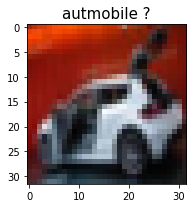

In [9]:
# Image in the training set
number_sample = 6  # test multiple ones

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Task:</b> Find a picture of a horse and plot it using the code above. You can use the same code cell.

</div>

50000
10000


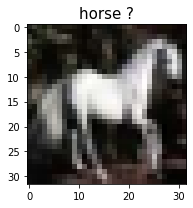

In [10]:
#Copy and paste the code from above and search for a horse (Task)
# STUDENT CODE HERE (1 pts)
number_sample = 13  

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()
print(len(x_train))
print(len(x_test))
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> Preprocess the data to ensure values between 0 and 1 by dividing rgb values by their maximum value.

</div>

In [11]:
# Data Preprocessing
# Divide RGB values of train AND test set 
# by their maximum value to ensure values between [0,1]

# STUDENT CODE HERE (1 pts)
x_train = x_train/255
y_train = y_train/255
x_test = x_test/255
y_test = y_test/255
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many training and test samples are there? 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>training samples : 50000 and
test samples : 10000 </div>


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why normalize the data?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>we normalize the data due to big scale starting from 0 to 255. This can impact positively on the accuracy </div>


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why using a categorical vector instead of a single output?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>Categorical vectors make it possible to have missing values where the single output does not have a representation of a missing value.</div>

## 2.4 Classification models for CIFAR-10

### 2.4.1 Neural Network Classifier:

In [12]:
def model_nn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Flatten(name='Flattening_MLP'),
        Dense(256, activation = 'relu', name='Hidden1_NN'),
        Dense(256, activation = 'relu', name='Hidden2_NN'),
        Dense(num_classes, activation = 'softmax', name='Output_NN')
    ])

### 2.4.2 Convolutional Neural Network Classifier:

In [13]:
def model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters= 16, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool1'),
        Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation = 'relu', name='FC-1'),
        Dense(num_classes, activation = 'softmax', name='Output_CNN')
    ])

### 2.4.3 Comparison of MLP and CNN Classifiers:


<div class="alert alert-block alert-success">
<b>Task:</b> In order to classify the images in Cifar-10, use the given MLP and CNN models to examine which one performs better.
Train both networks for 10 epochs and look at the results.
Feel free to use and change the code in the two code cells down below. If your network does not train, you might have not prepared the rgb-values in the right way (For example: You did not normalize or you did it too often).
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Structure of code cells below
<ul>
<li> Use the predefined functions to create your model
<li> Define the common TensorBoard logger with the configuration to look at training results later on
<li> Compile and fit the model
<li> Hint: If your models do not learn anything, check your data normalization. You might have not normalized your data or too often.
</li>


</ul>


</div>

In [14]:
# Method for plotting the accuracy history from the model training history
def plot_metric_history(history: tf.keras.callbacks.History, metric: str):
    n_epochs = len(history[metric])

    plt.plot(range(1, n_epochs + 1), history[metric], label=f'train {metric}')
    plt.plot(range(1, n_epochs + 1), history[f'val_{metric}'], label=f'validation {metric}')
    plt.legend()
    plt.title(f'Training and validation {metric} for {n_epochs} epochs of training.')
    plt.show()

Epoch 1/10
   1/1563 [..............................] - ETA: 0s - loss: 2.5139 - accuracy: 0.1250WARNING:tensorflow:From C:\tools\Anaconda3\envs\lama_gpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8545 - accuracy: 0.3306 - val_loss: 1.7259 - val_accuracy: 0.3750
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6796 - accuracy: 0.3963 - val_loss: 1.6446 - val_accuracy: 0.4169
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5974 - accuracy: 0.4264 - val_loss: 1.5948 - val_accuracy: 0.4203
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5438 - accuracy: 0.4447 - val_loss: 1.5399 - val_accuracy: 0.4528
Epoch 5/10
1563/1563 [==========================

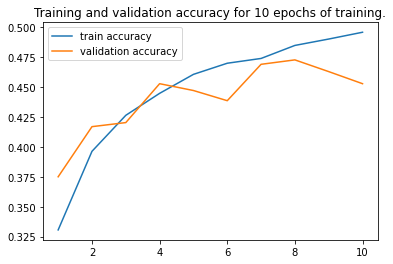

In [15]:
# Train the Neural Network (MLP)
# The following student code block can be left empty. 
# Use this whole block in order to train your MLP (the output of this block will be used for the grading of the task)
# STUDENT CODE HERE (4 pts)



# STUDENT CODE until HERE

nn_model = model_nn()
import time

config_nn = 'Cifar-10_MLP_{}'.format(int(time.time())) # Give a recognizable name

# The TensorBoard is a feature of tensorflow for the visualization of the training process 
nn_logger = TensorBoard(log_dir='logs/nn_logs/'+config_nn+'/')

nn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
history = nn_model.fit(x_train, y_train_categorical, batch_size = 32, epochs = 10, 
            validation_data = (x_test, y_test_categorical), callbacks = [nn_logger], verbose = 1)
plot_metric_history(history.history, 'accuracy')

<div class="alert alert-block alert-success">
<b>Task:</b> Use TensorBoard to control your training progress. An explanation on how to open your TensorBoard is given here:
    <a href="https://github.com/tensorflow/tensorboard/blob/master/docs/r1/summaries.md">TensorBoard</a>  (at the bottom of the webpage)
</div>

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3651 - accuracy: 0.5100 - val_loss: 1.0903 - val_accuracy: 0.6191
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0211 - accuracy: 0.6403 - val_loss: 0.9667 - val_accuracy: 0.6551
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8764 - accuracy: 0.6920 - val_loss: 0.8928 - val_accuracy: 0.6872
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7606 - accuracy: 0.7331 - val_loss: 0.8994 - val_accuracy: 0.6917
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6601 - accuracy: 0.7690 - val_loss: 0.8587 - val_accuracy: 0.7097
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5601 - accuracy: 0.8008 - val_loss: 0.9342 - val_accuracy: 0.6995
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4693 - accuracy: 0.8349 - val_loss: 0.9159 - val_a

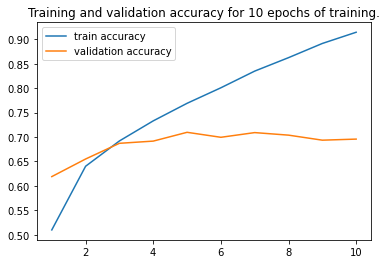

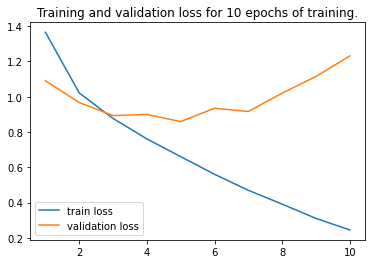

In [16]:
# Train the CNN
# The following student code block can be left empty. 
# Use this whole block in order to train your CNN (the output of this block will be used for the grading of the task)
# STUDENT CODE HERE (4 pts)

# STUDENT CODE until HERE

cnn_model = model_cnn()
config_cnn = 'Cifar-10_CNN_{}'.format(int(time.time())) # give a recognizable name

cnn_logger = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn+'/') 

cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
history = cnn_model.fit(x_train, y_train_categorical, batch_size = 32, epochs = 10, 
          validation_data = (x_test, y_test_categorical), callbacks = [cnn_logger], verbose = 1)
plot_metric_history(history.history, 'accuracy')
plot_metric_history(history.history, 'loss')

In [17]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flattening_MLP (Flatten)     (None, 3072)              0         
_________________________________________________________________
Hidden1_NN (Dense)           (None, 256)               786688    
_________________________________________________________________
Hidden2_NN (Dense)           (None, 256)               65792     
_________________________________________________________________
Output_NN (Dense)            (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 16)        448       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 16, 16, 32)        4640      
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 8, 8, 32)          0         
_________________________________________________________________
Flatt_CNN (Flatten)          (None, 2048)              0         
_________________________________________________________________
FC-1 (Dense)                 (None, 256)               524544    
_________________________________________________________________
Output_CNN (Dense)           (None, 10)               

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Which network performs better?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The CNN is better in every used metric </div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many parameters do the networks have? Therefore use the summary method (see Keras-Docs)...
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The MLP has 855,050 parameters and the CNN has 532,202 parameters</div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Where are most parameters stored in this CNN?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>In the FC-1 (Dense) layer</div>


### 2.4.4 Challenge: Optimize the Network! 

<div class="alert alert-block alert-success">
<b>Task:</b> Try to improve one of the models so that your validation accuracy is higher than 0.75 percent once!

<ul>
<li>Hint: Try to overfit first and then regularize. 
<li>Hint2: Therefore use L1/L2 - regularization and/or Dropout. BatchNormalization might improve things as well. Look therefore at Keras website for examples or ask tutors.
<li>Hint3: Use one of the functions <code>def model_nn()</code> or <code>def model_cnn()</code> from above. Have fun and good Luck!

</li>
</ul>
</div>

Epoch 1/15
782/782 [==============================] - 32s 41ms/step - loss: 1.5094 - accuracy: 0.4557 - val_loss: 1.4393 - val_accuracy: 0.4979
Epoch 2/15
782/782 [==============================] - 31s 40ms/step - loss: 1.1576 - accuracy: 0.5881 - val_loss: 1.0167 - val_accuracy: 0.6423
Epoch 3/15
782/782 [==============================] - 31s 40ms/step - loss: 1.0085 - accuracy: 0.6436 - val_loss: 0.9655 - val_accuracy: 0.6641
Epoch 4/15
782/782 [==============================] - 32s 41ms/step - loss: 0.9305 - accuracy: 0.6699 - val_loss: 0.9662 - val_accuracy: 0.6648
Epoch 5/15
782/782 [==============================] - 32s 40ms/step - loss: 0.8681 - accuracy: 0.6949 - val_loss: 0.8815 - val_accuracy: 0.6994
Epoch 6/15
782/782 [==============================] - 31s 40ms/step - loss: 0.8207 - accuracy: 0.7093 - val_loss: 0.7903 - val_accuracy: 0.7233
Epoch 7/15
782/782 [==============================] - 32s 40ms/step - loss: 0.7747 - accuracy: 0.7280 - val_loss: 0.8043 - val_accuracy:

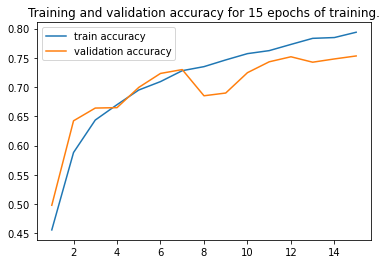

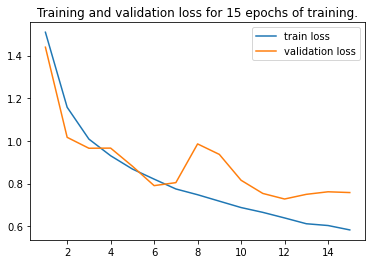

In [19]:
# Use this block to train the optimized Network.
# You can copy and paste code from above
# You might also want to look online for good training strategies
# STUDENT CODE HERE (7 pts)



# Use this whole block in order to train your CNN (the output of this block will be used for the grading of the task)

def model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters= 8, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1'),
        Conv2D(filters= 16, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1_2'),
        #BatchNormalization(),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool1'),
        Dropout(0.1),
       
        
        Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2'),
        Conv2D(filters= 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2_2'),
        BatchNormalization(),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool2'),
        Dropout(0.2),
        
        Flatten(name='Flatt_CNN'),
        Dense(256, activation = 'relu', name='FC-1'),
        Dropout(0.45),
        Dense(num_classes, activation = 'softmax', name='Output_CNN')
    ])

cnn_model = model_cnn()

config_cnn = 'Cifar-10_CNN_{}'.format(int(time.time())) # give a recognizable name

cnn_logger = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn+'/') 

cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
history = cnn_model.fit(x_train, y_train_categorical, batch_size = 64, epochs = 15, 
          validation_data = (x_test, y_test_categorical), callbacks = [cnn_logger], verbose = 1)
plot_metric_history(history.history, 'accuracy')
plot_metric_history(history.history, 'loss')

# STUDENT CODE until HERE


## 2.5 Data Augmentation

Another way to regularize your network is to augment the training data. Use therefore the ImageDataGenerator from Keras. We will later shift and rotate images by ourselves after optimizing on Cifar-10.

In [20]:
# Keras ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

### 2.5.1 Even more challenging ((Bonus Question :)))

<div class="alert alert-block alert-success">
<b>Task:</b> Improve your model and adapt it, how accurate can it get now?
Our solution is able to reach 0.8894 on the validation accuracy.
</div>

In [21]:
def model_cnn_aug() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters= 16, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool1'),
        Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation = 'relu', name='FC-1'),
        Dense(num_classes, activation = 'softmax', name='Output_CNN')
    ])

Epoch 1/10
10000/10000 [==============================] - 37s 4ms/step - loss: 1.6042 - accuracy: 0.4118 - val_loss: 1.2486 - val_accuracy: 0.5515
Epoch 2/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.3635 - accuracy: 0.5102 - val_loss: 1.1458 - val_accuracy: 0.5942
Epoch 3/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.2835 - accuracy: 0.5391 - val_loss: 1.1845 - val_accuracy: 0.5869
Epoch 4/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.2322 - accuracy: 0.5605 - val_loss: 1.0796 - val_accuracy: 0.6156
Epoch 5/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.2002 - accuracy: 0.5721 - val_loss: 1.0847 - val_accuracy: 0.6263
Epoch 6/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.1755 - accuracy: 0.5828 - val_loss: 1.0656 - val_accuracy: 0.6222
Epoch 7/10
10000/10000 [==============================] - 35s 3ms/step - loss: 1.1567 - accuracy: 0.5896 - val_loss: 1

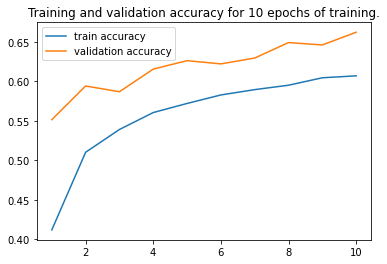

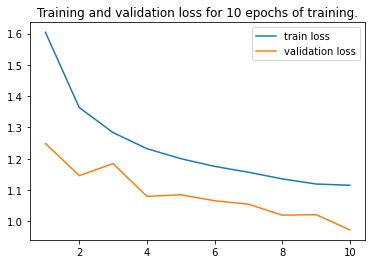

In [22]:
# Train your model that makes use of data augmentation
# Fit the training data to the data-generator
datagen.fit(x_train)

# Train your CNN_augmentation model:
cnn_aug_model = model_cnn_aug()
cnn_aug_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
config_cnn_aug = 'config_cnn_aug' # give a recognizable name
cnn_logger = TensorBoard(log_dir='logs/cnn_aug_logs/'+config_cnn_aug+'/') 

history = cnn_aug_model.fit(datagen.flow(x_train, y_train_categorical, batch_size = 5),
                            epochs=10, validation_data=(x_test, y_test_categorical),
                            callbacks=[cnn_logger], verbose=1, steps_per_epoch=10000)
plot_metric_history(history.history, 'accuracy')
plot_metric_history(history.history, 'loss')

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Can you imagine why the ground-truth labels were not augmented in the code cell above and might that be necessary? If the intuition is missing you might come back to this question after you finished the notebook or the implementation of data augmentation down below.  
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>Our validation data should be real data because we want to make sure that we dont train anything wrong. Which augmented data we could possibly continue the same mistake we made in the training. </div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> What do you think happens to images adapted by the DataGenerator?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>They are randomly rotated, shifted and flipped around the horizontal axis.</div>


## 2.6 Predict with your model

In [23]:
# Get the probabilities of one image prediction
x_tester = x_test[18,:,:,:]  

# Use numpy expand_dims before predicting with your model
# Print your predicted classes for the first test image (x_test[0,:,:,:])

# STUDENT CODE HERE (2 pts)
x_tester = np.expand_dims(x_tester, axis=0)
predicted = cnn_model.predict(x_tester)
print(predicted)
# STUDENT CODE until HERE


[[2.3794159e-06 1.1640901e-08 2.5389583e-11 1.5136492e-10 2.7013464e-11
  9.8853361e-15 4.9141208e-10 2.2131052e-14 9.9999487e-01 2.6870828e-06]]


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> With how much confidence was image <b>18</b> in the test set predicted as a bird by your model?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>1.2404786e-11</div>


## 2.7 Let's have a closer look / Get the weights in a convolutional layer

In [24]:
# Get the weights of a layer of one of your models, you specified by name
layer_visual = cnn_model.get_layer('Conv1') 
weights = layer_visual.get_weights()[0]

# Take some of them, last dimension are the channels
weights_2d = weights[:,:,0,0] # filters are [:,:, dimension of spatial input (e.g.: rgb=3), nb_filters] in a layer
weights_2d


array([[-0.07976943, -0.05570446, -0.05920246],
       [ 0.11897048,  0.02529039,  0.23054174],
       [ 0.04856183,  0.11183183,  0.04427   ]], dtype=float32)

<div class="alert alert-block alert-success">
<b>Task:</b> Look at layer Conv2 (or another layer than conv1) and plot one filter-kernel-slice of it's 3rd filter. Hint: Use weights.shape to understand the kernel's dimensions.
</div>

In [25]:
# Copy and paste necessary code for this Task from above.
# STUDENT CODE HERE (2 pts)
layer_visual = cnn_model.get_layer('Conv2') 
weights = layer_visual.get_weights()[0]
weights_2d = weights[:,:,0,3]
print(weights_2d)
# STUDENT CODE until HERE


[[ 0.12045389  0.14445509  0.05520058]
 [-0.15728414 -0.05666241 -0.13487488]
 [-0.03460906  0.06265673  0.01625392]]


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Explain what the dimensions a,b,c and d are in 'weights[a,b,c,d]' like it is used in the code block above. 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>a and b are the weights of the 3*3 filters. c is the depth of the input/image for example in an Black & white image it is 1 and d is the number of the filter</div>










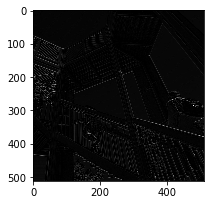

In [26]:
#Load Ascent image from scipy and convolve it with the previous loaded filter
ascent = misc.ascent()
ascent = signal.convolve2d(ascent, weights_2d, boundary='symm', mode='same')
ascent = np.maximum(ascent, 0)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.imshow(ascent, interpolation='nearest', cmap='gray')
plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Task:</b> Use different filters on the input image. Can you notice any differences? (A few words)
</div>

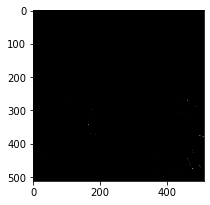

In [27]:
# Copy and paste the code from above. And use different filters.

# STUDENT CODE HERE (3 pts)
layer_visual = cnn_model.get_layer('Conv1') 
weights = layer_visual.get_weights()[0]
weights_2d = weights[:,:,1,7]
ascent = misc.ascent()
ascent = signal.convolve2d(ascent, weights_2d, boundary='symm', mode='same')
ascent = np.maximum(ascent, 0)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.imshow(ascent, interpolation='nearest', cmap='gray')
plt.tight_layout()

# STUDENT CODE until HERE

# What did you notice? Write 2-3 Lines here:
#That image changes randomly because we are using random filters
#
#

## 2.8 Visualize the activation in a feedforward pass

In the following code we will directly use the output of the convolutional layer in the CNN and visualize it. This is approximately the same as we did above.  

TypeError: list indices must be integers or slices, not float

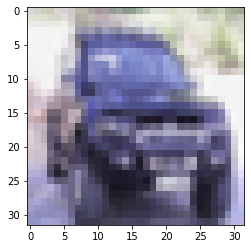

In [28]:
# Get the output in a feedforward process from a model with get_output function
number_sample = 9

# Model and layer where the feature maps come from
feature_map = utils.get_output(cnn_model, 'Conv1', np.expand_dims(x_test[number_sample,:,:,:],axis=0))

# Take only 32 filters of the layer if there are so many
feature_map = feature_map[:,:,:,:32]

plt.imshow(x_test[number_sample,:,:,:])
plt.title(classes[y_test[number_sample].item()])
plt.subplots(figsize=(15, 15))

num_columns = 4
num_rows = 8
for i in range(0,feature_map.shape[-1]):
    
    plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(feature_map[0,:,:,i], cmap ='gray')
    plt.axis('off')

## 2.9 Ramping things up: Autoencoder for Semantic Segmentation


### 2.9.1 Semantic Segmentation

Convolutional neural network based models have been built up in wide variety to solve
different tasks. In general there can be named the challenges of Classiffication, Semantic
Segmentation, Object Detection and Instance Segmentation among complex newer ones
like Keypoint Detection or DensePose etc..
Assigning an object class to be found in a
given image as whole, is designated as classiffication, whereas in semantic segmentation all
pixels have to be identified by the object classes they refer to. In contrast to classiffication
there can be multiple object classes found in one picture.




### 2.9.2 Segnet - An Autoencoder for Semantic Segmentation

Based on the [Kitti Road dataset](http://www.cvlibs.net/datasets/kitti/eval_road.php). A segmentation dataset for autonomous driving created by _Karlsruhe Institute of Technology (KIT)_, MPI Tübingen and University of Toronto.


![CNN Autoencoder](images/segnet.png "CNN Autoencoder")


                                    Source: http://mi.eng.cam.ac.uk/projects/segnet/

It is possible to solve this classification task by using a softmax layer in the end or regressing a rgb image given as ground truth. In the latter case, the rgb values might not be exactly the same and there is an intrinsic order in the classes even when using a threshold afterwards but the dimension space is way lower. In general go with the first approach, because it is solving the problem as a regular classification task and common practice. It is not recommended to do this with regression. The second approach is just to show alternative ways of approaching one problem (and for fun).

The network architecture of an autoencoder uses some structure that was often trained previously on some data like [ImageNet](http://www.image-net.org/). The idea is that these weights already have something in common with the task later on so that training converges faster and possibly better than starting off with randomized weights. In the SegNet architecture above the standard classification network architecture `VGG-16` is used to encode the input image into higher abstract space. Afterwards Upsampling and Convolutions project extracted features back into the original input space.

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> In which city were the images of this dataset created?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>karlsruhe</div>


## 2.10 The Data

First, we will load the data. The dataset can found in the data folder and needs to be unpacked from the zip archive. Please unpack the dataset in the data folder. Conveniently, the data is already splitted to training and validation.

In [77]:
# As regression or classification?
# 0-regre, 1-classification

# Set class_or_regr 1 first.
class_or_regr = 0

path_train_img = os.path.join(root, 'training/image_2')
path_train_gt_img = os.path.join(root, 'training/semantic_rgb')

path_test_img = os.path.join(root, 'testing/image_2')

x_train_semseg = np.load(os.path.join(root, 'x_train.npy'))
y_train_semseg = np.load(os.path.join(root, 'y_train.npy'))

x_val_semseg = np.load(os.path.join(root, 'x_val.npy'))
y_val_semseg = np.load(os.path.join(root, 'y_val.npy'))

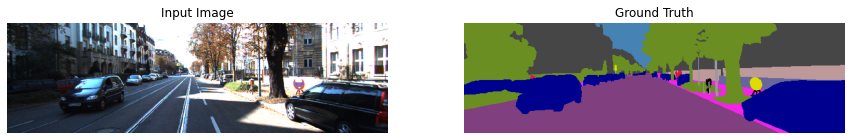

In [78]:
#### DO NOT EDIT
plt.subplots(figsize=(15, 15))
num_columns = 2
num_rows = 1

for i in range(0,2):
    plt.subplot(num_rows, num_columns, i+1)
    if i == 0:
        plt.title('Input Image')
        plt.imshow(x_train_semseg[0,:,:,:])  # Visualizes the input data
    else:
        plt.title('Ground Truth')
        plt.imshow(y_train_semseg[0,:,:,:])  # Visualizes the ground truth
    plt.axis('off')

## 2.11 The Labels

In [79]:
#### DO NOT EDIT
# Load shortened form of labels with referring rgb values
rgb_array = np.load(os.path.join(root, 'rgb_array.npy'))

# Create bitmaps ... this will take some time
if class_or_regr == 1:
    y_train_bitmap = utils.transform_into_bitmap(y_train_semseg, rgb_array.tolist())
    y_val_bitmap = utils.transform_into_bitmap(y_val_semseg, rgb_array.tolist())

In [80]:
# Visualize a bitmap of one class out of 29
if class_or_regr == 1:
    plt.title('Bitmap of one class')
    plt.imshow(y_train_bitmap[0,:,:,16])  # Visualize a bitmap of your desire
    plt.axis('off')

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many samples are there for training and validation?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>160 for training and 40 for validation</div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Explain the dimensions of the bitmaps! (e.g.: y_train_bitmap[?,?,?,?]) 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>1 is the number of the sample, 2 is the height, 3 is the width and 4 is the label</div>






## 2.12 Data Augmentation with numpy

Previously, we learned that we can increase the number of our training-samples using data augmentation.

<div class="alert alert-block alert-success">
<b>Task:</b> In the following images are augmented by ourselves. Use `numpy` functions to augment the images as written in the comments.
</div>

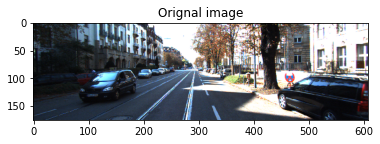

In [81]:
#### DO NOT EDIT
plt.title('Orignal image')
plt.imshow(x_train_semseg[0,:,:,:])

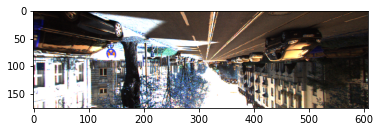

In [82]:
# Use a numpy function to flip the image horizontally

# STUDENT CODE HERE (2 pts)
flip = np.flip(x_train_semseg[0,:,:,:])
plt.imshow(flip)
# STUDENT CODE until HERE

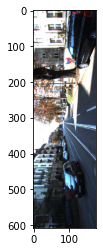

In [83]:
# Use a numpy function to rotate the image

# STUDENT CODE HERE (2 pts)
rotated = np.rot90(x_train_semseg[0,:,:,:])
plt.imshow(rotated)
# STUDENT CODE until HERE

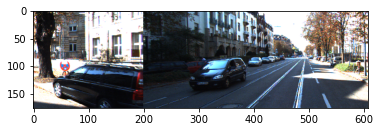

In [84]:
# Use a numpy function to shift the image

# STUDENT CODE HERE (2 pts)
rolled = np.roll(x_train_semseg[0,:,:,:],600)
plt.imshow(rolled)
# STUDENT CODE until HERE

In [85]:
#### DO NOT EDIT
# Execute this block to augment the data
# You can define which augmentation methods you would like to include
# in default all three methods are applied to the images in the training set

x_train_aug_semseg = utils.augment_images(x_train_semseg, h_flip=True, rotate180=True, shift_random=True)

if class_or_regr == 1:
    #Use the function to augment the ground_truth_bitmaps in the training set
    y_train_aug_bitmap = utils.augment_images(y_train_bitmap, h_flip=True, rotate180=True, shift_random=True)

elif class_or_regr == 0:
    # Use the function to augment the ground_truth_images in the training set
    y_train_aug_semseg = utils.augment_images(y_train_semseg, h_flip=True, rotate180=True, shift_random=True)
    

stage1
stage2
done
stage1
stage2
done


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Explain in some words why we want to do data augmentation, especially on a data set like the kitti.
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>With data augmentation we can improve our model accuracy while reducing the work of collecting and especially labeling data. In datasets with pictures like the kitti dataset its pretty much work labeling the tress and exterior features but rotating, shifting or just copie pasting these features into another picture is not much work</div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many samples are there now (using all given augmentation methods)?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>pretty much as many as we want because shifting by 600 is a defferent picture than shifting by 200 and we also could combine different methodes</div>


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Why is it necessary to rotate the image by 180 degrees (and why not in 90 degrees steps)?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>Because the format wouldnt be the same</div>


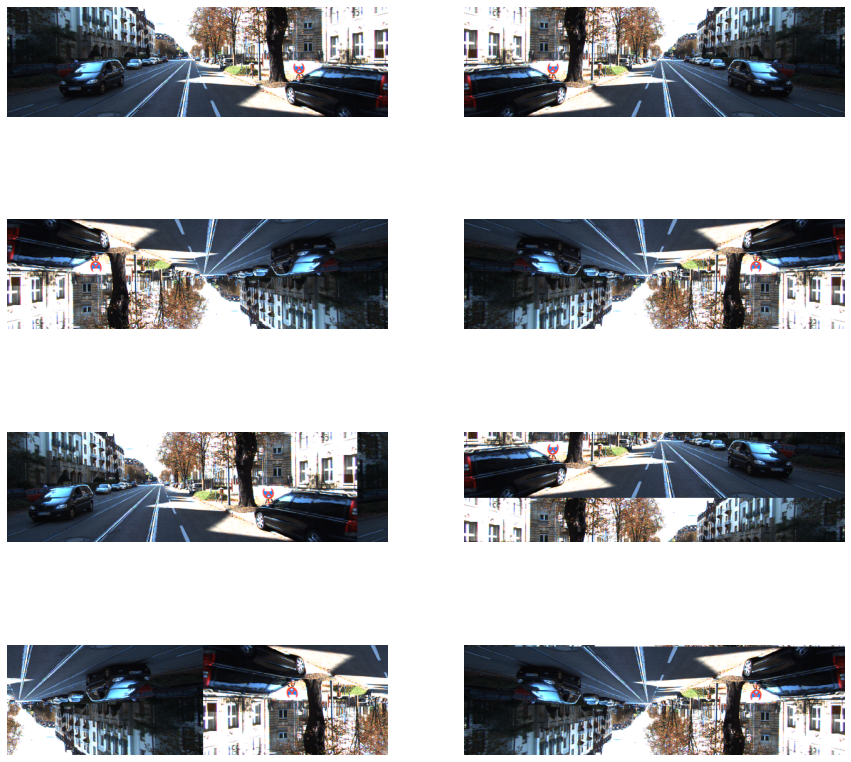

In [86]:
#### DO NOT EDIT
# Visualize all possible augmentations of one image

plt.subplots(figsize=(15, 15))
num_columns = 2
num_rows = 4
nb_augments = int(x_train_aug_semseg.shape[0]/160)

for i in range(0, nb_augments):
    
    plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(x_train_aug_semseg[i*160,:,:,:])
    plt.axis('off')

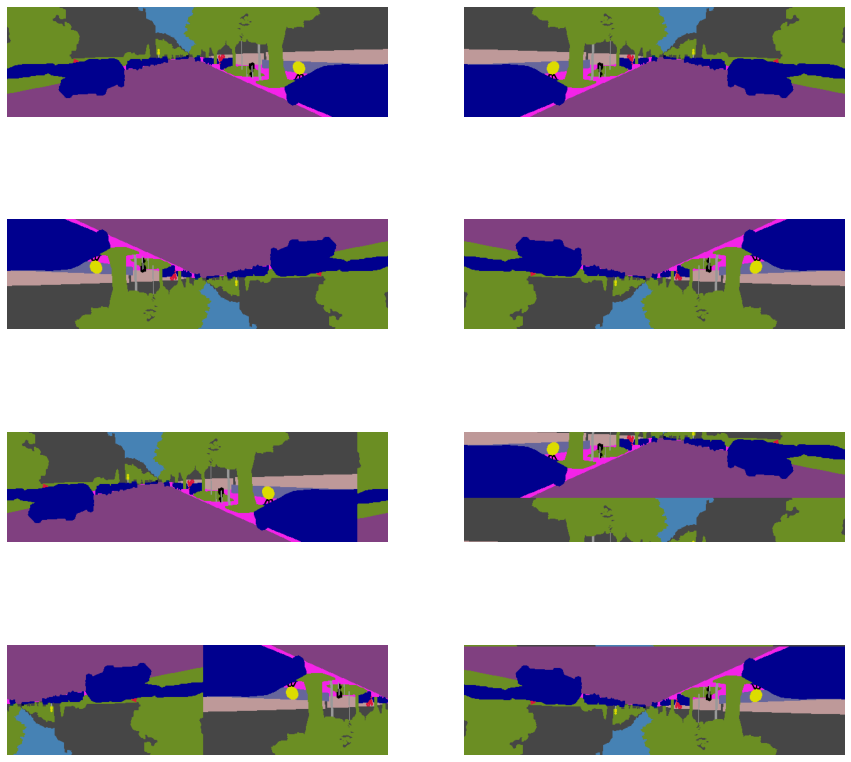

In [87]:
#### DO NOT EDIT
# Visualize all possible augmentations of reffering ground truth bitmap of one class

plt.subplots(figsize=(15, 15))
num_columns = 2
num_rows = 4

for i in range(0,nb_augments):
    
    plt.subplot(num_rows, num_columns, i+1)
    
    if class_or_regr == 0:
        plt.imshow(y_train_aug_semseg[i*160,:,:])
    elif class_or_regr == 1:
        plt.imshow(y_train_aug_bitmap[i*160,:,:,16])
    plt.axis('off')

### 2.12.1 Normalize the data

In [88]:
#### DO NOT EDIT
x_train_aug_semseg.astype('float32')
x_val_semseg.astype('float32')

x_train_aug_semseg = x_train_aug_semseg / 255
x_val_semseg = x_val_semseg / 255

if class_or_regr == 1: 
    # only divide in regression task, bitmaps are already between 0 and 1
    y_train_aug_semseg.astype('float32')
    y_val_semseg.astype('float32')
    y_train_aug_semseg = y_train_aug_semseg / 255
    y_val_semseg = y_val_semseg / 255

## 2.13 Transfer Learning with VGG-16 (Encoder)

In [89]:
# Import the VGG-16 model as VGG16
# STUDENT CODE HERE (1 pts)
from tensorflow.keras.applications.vgg16 import VGG16
# STUDENT CODE until HERE

In [90]:
#### DO NOT EDIT
vgg16_encoder = VGG16(weights='imagenet', include_top=False) # this might take some time to download
# vgg16_encoder.summary() 

## 2.14 Train the autoencoder

In [91]:
# Use this to definitely change the name before training in combination with the next cell
display(ae_specification)

def printer(sender):
    print(ae_specification.value)

ae_specification.on_submit(printer)

Text(value='autoencoderclassification')

The current training specification is referred to as autoencoderclassification
 95/320 [=======>......................] - ETA: 34:23 - loss: 15635.6592 - accuracy: 0.4969WARNING:tensorflow:Can save best model only with val_loss available, skipping.


191/320 [================>.............] - ETA: 19:48 - loss: 15575.7314 - accuracy: 0.4935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


287/320 [=========================>....] - ETA: 5:04 - loss: 15499.4492 - accuracy: 0.5007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


320/320 [==============================] - 2975s 9s/step - loss: 15506.8936 - accuracy: 0.5022 - val_loss: 14837.9795 - val_accuracy: 0.4875


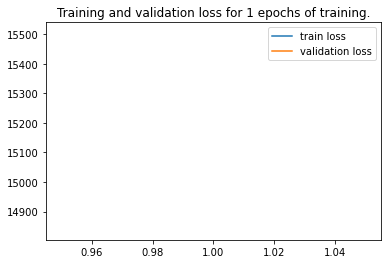

In [92]:
# Check if the name changed.
print("The current training specification is referred to as", ae_specification.value)
if old_spec == ae_specification.value:
    print("There were no changes made to the previous training name!")


# Callbacks for tensorboard and save weights for the best performing period.
tensorboard = TensorBoard(log_dir='logs/autoencoder_logs/'+ae_specification.value+'/')
Checkpoint = ModelCheckpoint('logs/autoencoder_logs/'+ae_specification.value+'/weights.hdf5'
                             , monitor='val_loss', save_best_only=True, save_weights_only=True, mode='auto',
                            save_freq=1)

# Build the Autoencoder
autoencoder = utils.build_ae(vgg16_encoder, x_train_semseg.shape[1:], class_or_regr)

# Compile the models depending on the task
if class_or_regr == 0:
    
    autoencoder.compile(loss='mean_squared_error', metrics = ['accuracy'], optimizer='Adam')
    
    x_train_ae = x_train_aug_semseg
    y_train_ae = y_train_aug_semseg
    
    x_val_ae = x_val_semseg
    y_val_ae = y_val_semseg
    
    history = autoencoder.fit(x_train_ae, y_train_ae, batch_size = 4,#4
                epochs=1, validation_data=(x_val_ae, y_val_ae),
                callbacks=[tensorboard, Checkpoint], verbose=1)
    plot_metric_history(history.history, 'loss')
    
elif class_or_regr == 1:
    
    autoencoder.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
    
    x_train_ae = x_train_aug_semseg
    y_train_ae = y_train_aug_bitmap
    
    x_val_ae = x_val_semseg
    y_val_ae = y_val_bitmap
    
    history = autoencoder.fit(x_train_ae, y_train_ae, batch_size = 4,#4
                epochs=1, validation_data=(x_val_ae, y_val_ae),
                callbacks=[tensorboard, Checkpoint], verbose=1)
    plot_metric_history(history.history, 'accuracy')

# If training was successfull, do not use the same name again
old_spec = ae_specification.value

## 2.14.1 Make some predictions with your autoencoder

It is possible to load already pre-trained weights to get some predictions.
Therefore use: 
autoencoder.load_weights(path_to_weights)

Possible weights:
- Best of MSE trained 200 epochs (/logs/autoencoder_logs/Regression200/weights.hdf5)
- Best of Classification trained 200 epochs (/logs/autoencoder_logs/Classifier200/weights.hdf5)

Look at their tensorboard results as well.


<div class="alert alert-block alert-info">
<b>Note:</b> In order to look at regression results, change <code>class_or_regr</code> in subsection the data to 0, execute all blocks below. It might be easier to skip training if only the results of already trained models interest.



</div>

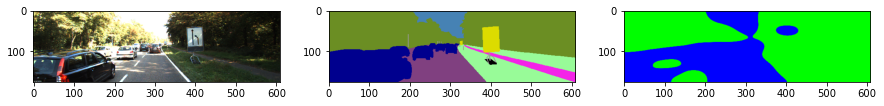

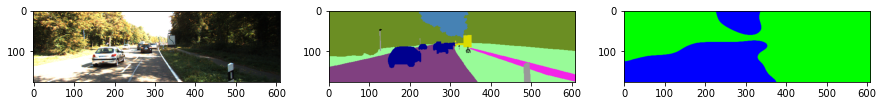

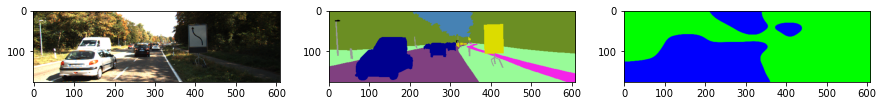

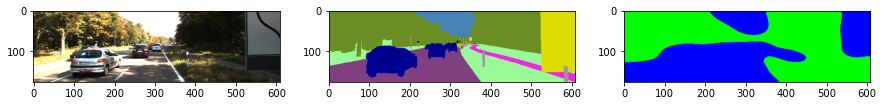

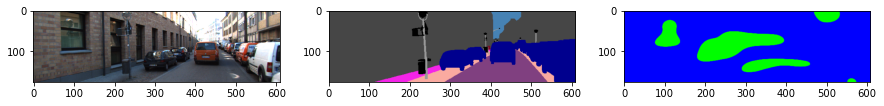

In [93]:
# Loop through training images, and visualize those between lower and upper bound
# Validation images are index from 160 up to 200

# model.load_weights('path') #uncommend this if you want to use the pre-trained model weights, set the path by yourself

lower_bound = 160
upper_bound = 165

utils.ae_predict(autoencoder, path_train_img, path_train_gt_img, lower_bound, upper_bound,
                 ae_specification.value, class_or_regr)

## 2.15 Some final questions:

<div class="alert alert-block alert-success">
<b>Question (3 pts):</b> Explain differences between the regression and classification variants.
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The classification variant only classified the pictures in blue and green while the regession variant is marking the picture in different shades of green purple and blue </div>



<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> What would you suggest to improve your segmentation model?
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>Try different metrics or optimize the transfer learning because we only get an accuracy: 0.5022 and an  val_accuracy: 0.4875 which is not really great</div>


## Further Reading

[SegmentationForAutonomousDriving](https://blog.playment.io/semantic-segmentation-models-autonomous-vehicles/#U-Net)

[Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

[BatchNormalization](https://arxiv.org/pdf/1502.03167.pdf)

# Feedback and Recap

<div class="alert alert-block alert-success">
<b>Question (3pt):</b>  Please conclude in a few sentences what you learned in this exercise
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>In 7.1 we learned the basics about Convolutional Neural Networks. We got to know convolutional layers, relu layers and pooling layers. In 7.2 we worked with the Cifar-10 dataset, trying out a normal MLP and a CNN. Than we added some layers like a Dropout and a BatchNormalization to optimize the network. In the last task we learned sth about data augmentation and transfer learning.</div>









